### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
# Soma os valores da coluna "Preço" da tabela 'loja'
soma_precos = loja['Preço'].sum()

# Exibe o resultado
print(f"A soma dos preços é: R$ {soma_precos}")


A soma dos preços é: R$ 1534509.12


# 2. Vendas por Categoria


In [4]:
categoria = loja['Categoria do Produto'].value_counts()
print(categoria)

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


# 3. Média de Avaliação das Lojas

In [10]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'


In [11]:
# Junta todas as lojas em um único DataFrame
todas_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Exibe as 5 primeiras linhas para conferir
todas_lojas.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [13]:
media_avaliacao = todas_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()

# Arredonda a média para 2 casas decimais
media_avaliacao['Avaliação da compra'] = media_avaliacao['Avaliação da compra'].round(2)

print(media_avaliacao)


     Loja  Avaliação da compra
0  Loja 1                 3.98
1  Loja 2                 4.04
2  Loja 3                 4.05
3  Loja 4                 4.00


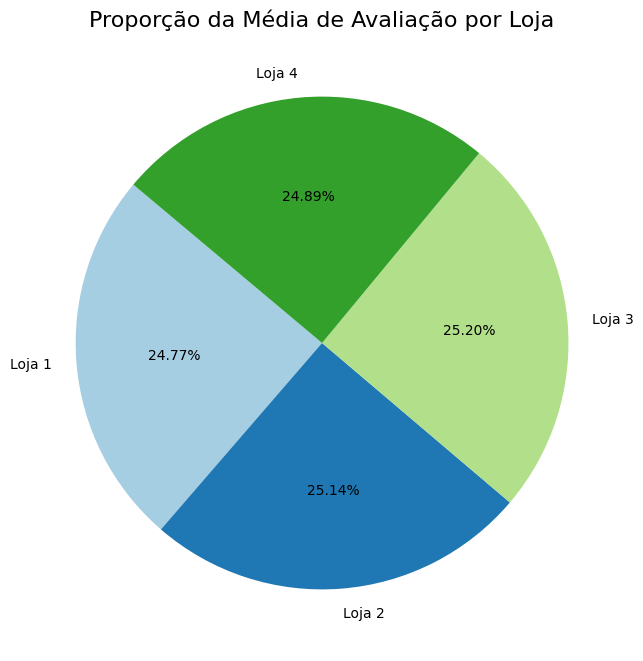

In [18]:
import matplotlib.pyplot as plt

# Garantir que a média de avaliação está pronta
media_avaliacao = todas_lojas.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao['Avaliação da compra'] = media_avaliacao['Avaliação da compra'].round(2)

# Criação do gráfico de pizza
plt.figure(figsize=(8,8))

plt.pie(
    media_avaliacao['Avaliação da compra'],           # Dados (médias)
    labels=media_avaliacao['Loja'],                    # Nomes das lojas
    autopct='%1.2f%%',                                 # Mostrar porcentagem com duas casas decimais
    startangle=140,                                    # Ângulo inicial
    colors=plt.cm.Paired.colors                        # Paleta de cores
)

# Título do gráfico
plt.title('Proporção da Média de Avaliação por Loja', fontsize=16)

# Mostra o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [16]:
# Conta quantas vezes cada produto aparece
vendas_produtos = todas_lojas['Produto'].value_counts().reset_index()

# Renomeia as colunas para ficar mais claro
vendas_produtos.columns = ['Produto', 'Quantidade de Vendas']



# Produto mais vendido
produto_mais_vendido = vendas_produtos.iloc[0]
print(f"Produto mais vendido: {produto_mais_vendido['Produto']} com {produto_mais_vendido['Quantidade de Vendas']} vendas.")

# Produto menos vendido
produto_menos_vendido = vendas_produtos.iloc[-1]
print(f"Produto menos vendido: {produto_menos_vendido['Produto']} com {produto_menos_vendido['Quantidade de Vendas']} vendas.")


Produto mais vendido: Cômoda com 210 vendas.
Produto menos vendido: Celular ABXY com 157 vendas.


# 5. Frete Médio por Loja


In [17]:
# Calcula o frete médio para cada loja
frete_medio = todas_lojas.groupby('Loja')['Frete'].mean().reset_index()

# Arredonda para 2 casas decimais para ficar mais bonito
frete_medio['Frete'] = frete_medio['Frete'].round(2)

# Exibe o resultado
print(frete_medio)


     Loja  Frete
0  Loja 1  34.69
1  Loja 2  33.62
2  Loja 3  33.07
3  Loja 4  31.28


# **Relatorio**

 A Loja 2 parece ser a melhor candidata para ser vendida.

Motivos:

Tem a pior média de avaliação (clientes menos satisfeitos).

Apesar de ter frete baixo, não necessariamente isso segura o cliente.

Manter uma loja mal avaliada exige muito investimento para corrigir a reputação.

Melhor vender enquanto ainda tem algum valor.